In [1]:
# Setup logging
from timeseria import logger
logger.setup(level='INFO')

# Set default plot type as image
import os
os.environ["DEFAULT_PLOT_TYPE"] = "image"

⚠️ In this notebook, plots are configured to be rendered as images because otherwise they won't display correctly on GitHub or when the notebook is loaded (usually because not [trusted](https://stackoverflow.com/questions/44943646/jupyter-notebook-not-trusted)). To get interactive plots, remove the line above (or change it to "interactive") and re-run the notebook.

# Operations

This notebook showcase various operations that can be performed on time series data with [Timeseria](https://github.com/sarusso/Timeseria). These include:

 - min, max, avg
 - slice, filter, select
 - diffs and cumulative sums
 - moving average
 - normalize and scaling
 - duplicate and merge
 - data labels renaming
 


In [2]:
from timeseria import TEST_DATASETS_PATH
from timeseria.datastructures import TimeSeries

# Get a demo time series (and cut it to 5000 elements)
timeseries = TimeSeries.from_csv(TEST_DATASETS_PATH + 'humitemp_long.csv')[0:5000]

In [3]:
# Have a look at the time series
timeseries

Time series of #5000 points at variable resolution (~615s), from point @ 1546475294.0 (2019-01-03 00:28:14+00:00) to point @ 1549793752.0 (2019-02-10 10:15:52+00:00)

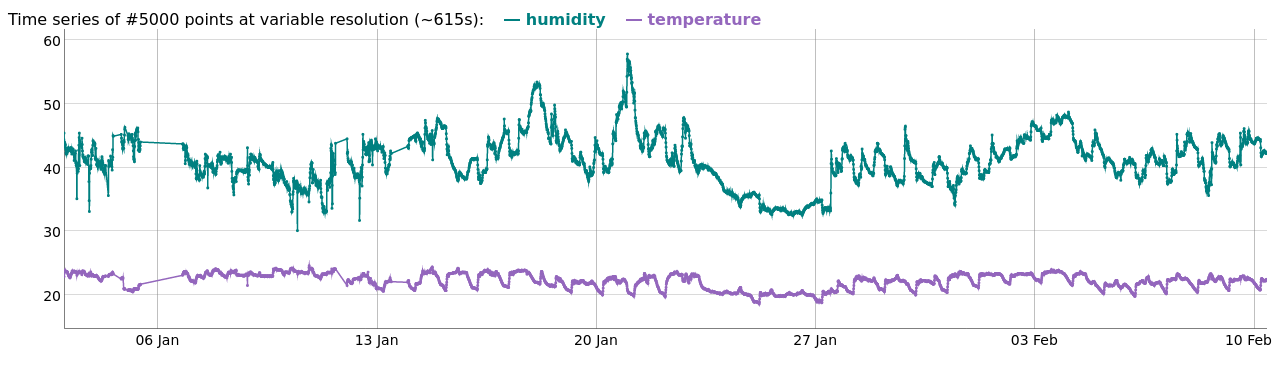

In [4]:
# Plot the time series
timeseries.plot()

In [5]:
# Get the minimum value for each data label
timeseries.min()

{'humidity': 30.1, 'temperature': 18.6}

In [6]:
# Get the minimum value for a specific data label 
timeseries.max('temperature')

24.6

In [7]:
# Select datapoint(s) where the temperature equals a given value
timeseries.select('temperature=24.6')

[Time point @ 1547151749.0 (2019-01-10 20:22:29+00:00) with data "{'temperature': 24.6, 'humidity': 36.39999}"]

In [8]:
# Get average values for each data label
timeseries.avg()

{'humidity': 41.12877180799991, 'temperature': 22.1871957959999}

In [9]:
# Slice the time series using index-based slicing
timeseries[100:200]

Time series of #100 points at variable resolution (~615s), from point @ 1546543987.0 (2019-01-03 19:33:07+00:00) to point @ 1546634501.0 (2019-01-04 20:41:41+00:00)

In [10]:
# Get the 13-th element of the time series using index-based access
timeseries[13]

Time point @ 1546483293.0 (2019-01-03 02:41:33+00:00) with data "{'temperature': 23.7, 'humidity': 42.2}"

In [11]:
# Filter the time series on a specific data label (also works with the square brackets notation)
timeseries.filter('humidity')

Time series of #5000 points at variable resolution (~615s), from point @ 1546475294.0 (2019-01-03 00:28:14+00:00) to point @ 1549793752.0 (2019-02-10 10:15:52+00:00)

In [12]:
# Slice the time series on a datetime (also works with the square brackets notation)
from propertime.utils import dt
timeseries.slice(from_dt=dt(2019,1,23), to_dt=dt(2019,1,24))

Time series of #140 points at variable resolution (~616s), from point @ 1548202012.0 (2019-01-23 00:06:52+00:00) to point @ 1548287633.0 (2019-01-23 23:53:53+00:00)

[INFO] timeseria.transformations: Using auto-detected sampling interval: 615.0s
[INFO] timeseria.transformations: Resampled 5000 DataTimePoints in 5530 DataTimePoints


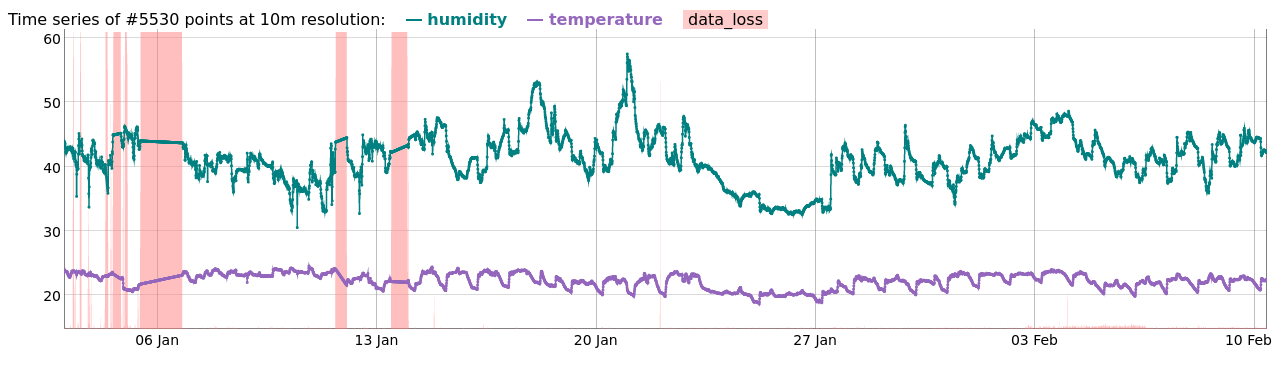

In [13]:
# Now resample the time series at 10-minute samplig interval to make data uniform
timeseries = timeseries.resample(600)
timeseries.plot()

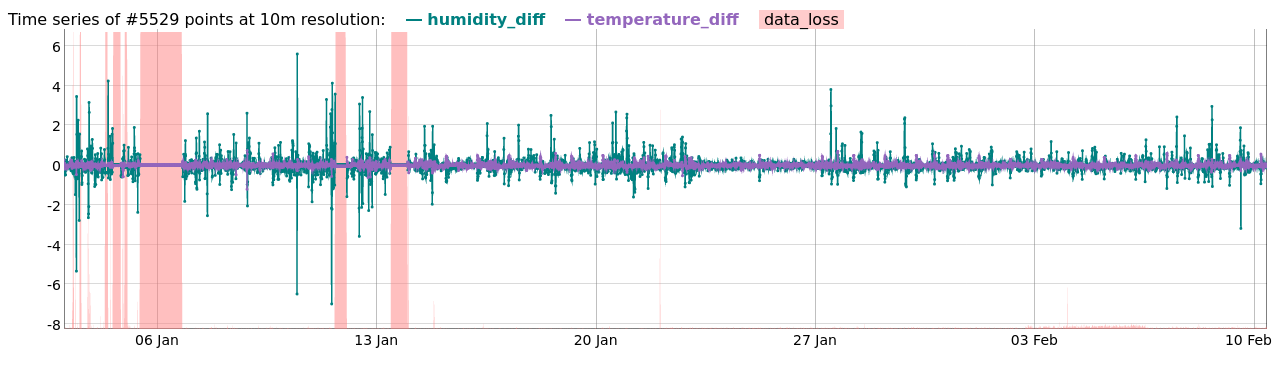

In [14]:
# Compute the differences 
timeseries_diff = timeseries.diff()
timeseries_diff.plot()

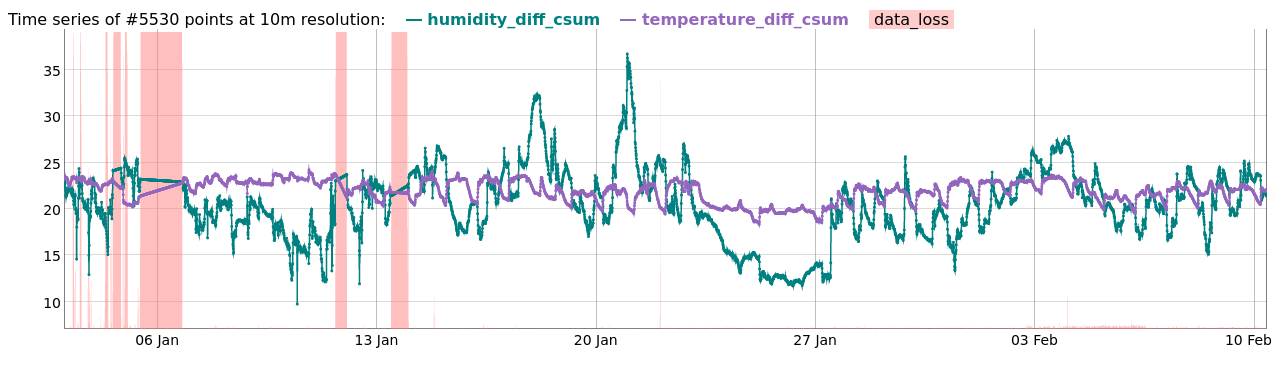

In [15]:
# C0mpute the cumulative sum, set the offset as the first temeperature observation (get back to original data)
timeseries_diff_csum = timeseries_diff.csum(offset=23.15)
timeseries_diff_csum.plot()

In [16]:
# Rename the data labels
timeseries_diff_csum.rename_data_label('humidity_diff_csum', 'humidity')
timeseries_diff_csum.rename_data_label('temperature_diff_csum', 'temeperature')

# Print first datapoint: data alabels are now changed
timeseries_diff_csum[0]

Time point @ 1546476000.0 (2019-01-03 00:40:00+00:00) with data "{'humidity': 23.15, 'temeperature': 23.15}" and data_loss="0"

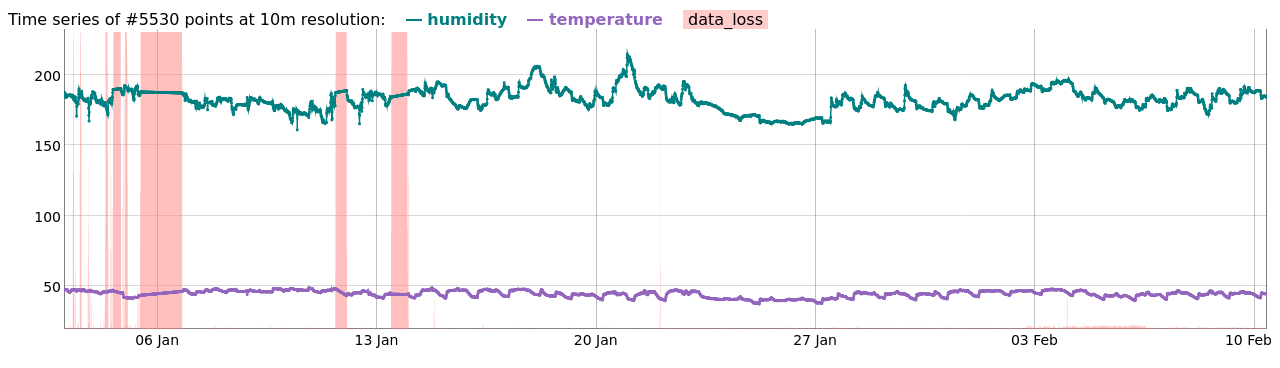

In [17]:
# Rescale the time series by a factor of 2, then apply a 100 offset on humidty only, and plot 
timeseries_r = timeseries.rescale(2)
timeseries_r_o = timeseries_r.offset({'humidity':100})
timeseries_r_o.plot()

In [18]:
# Get a copy of the time series
timeseries_2 = timeseries.duplicate() 

In [19]:
# Normalize the copy of the time series, in-place
timeseries_2.normalize(inplace=True)

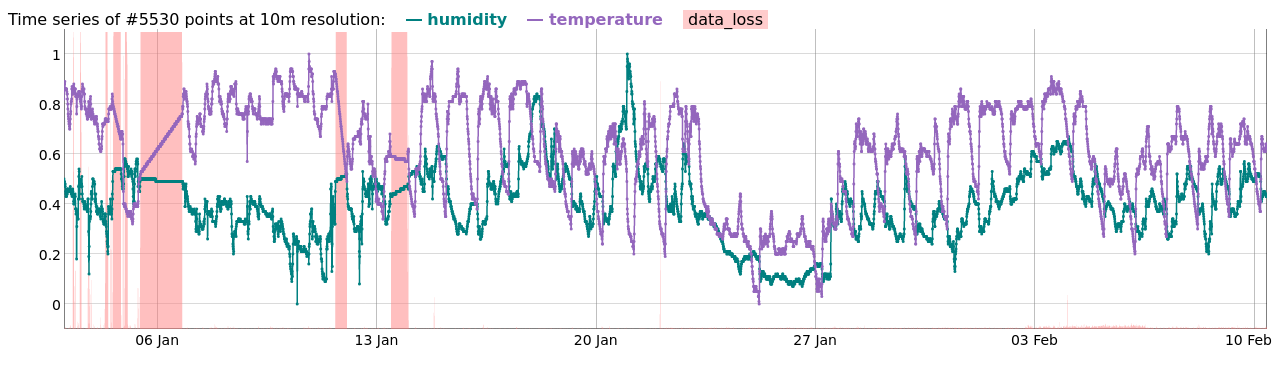

In [20]:
# Plot
timeseries_2.plot()

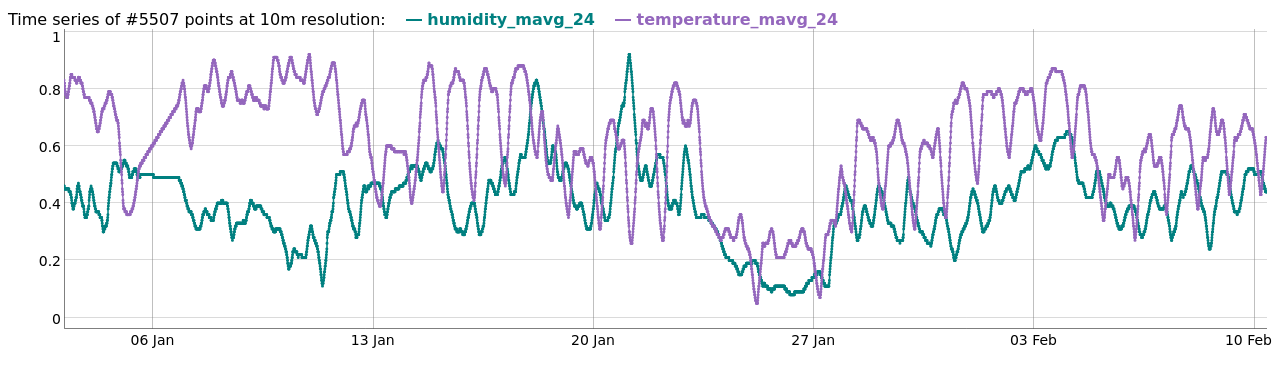

In [21]:
# Compute a moving average on the temperature. The data loss gets dropped as it not well defined anymore
timeseries_2.mavg(24).plot()

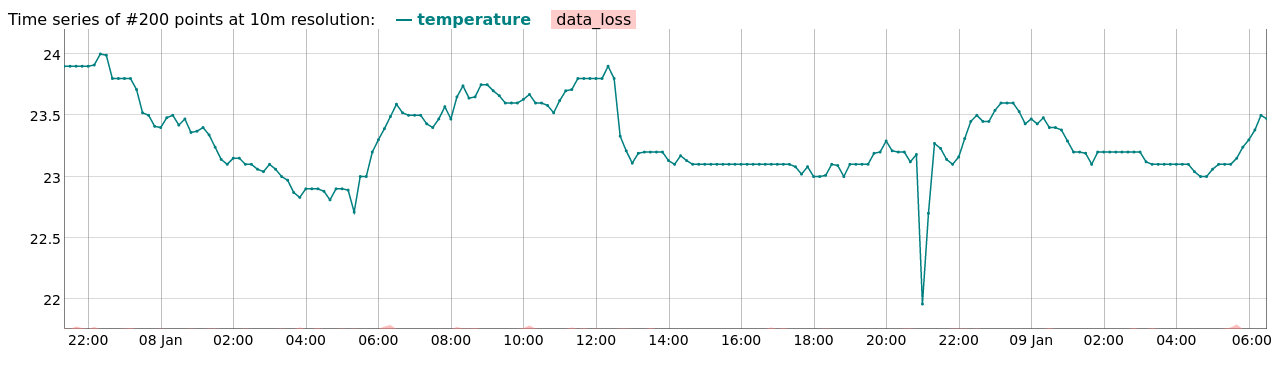

In [22]:
# Get a slice for the temperature part of the time seris
temeprature_slice_timeseries = timeseries['temperature'][700:900]
temeprature_slice_timeseries.plot()

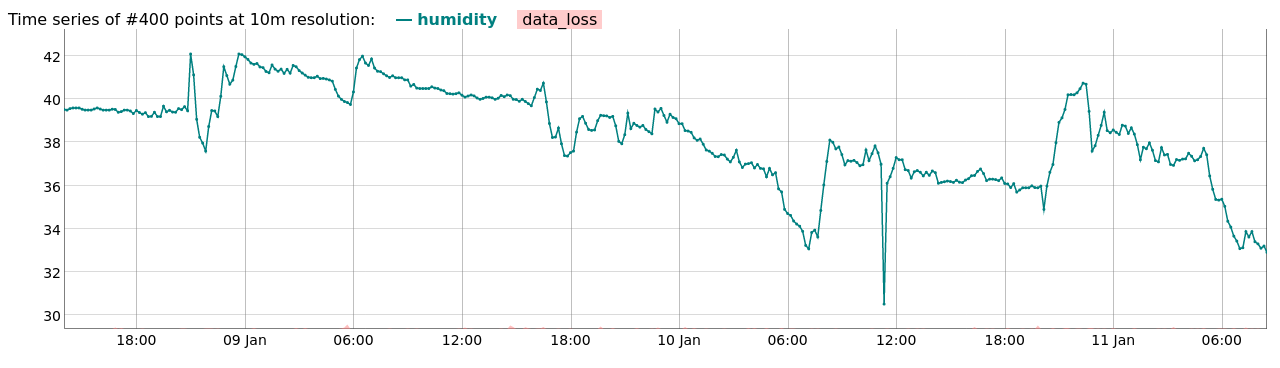

In [23]:
# Get another slice, for the himidity part of the time seris on a different part
humidity_slice_timeseries = timeseries['humidity'][800:1200]
humidity_slice_timeseries.plot()

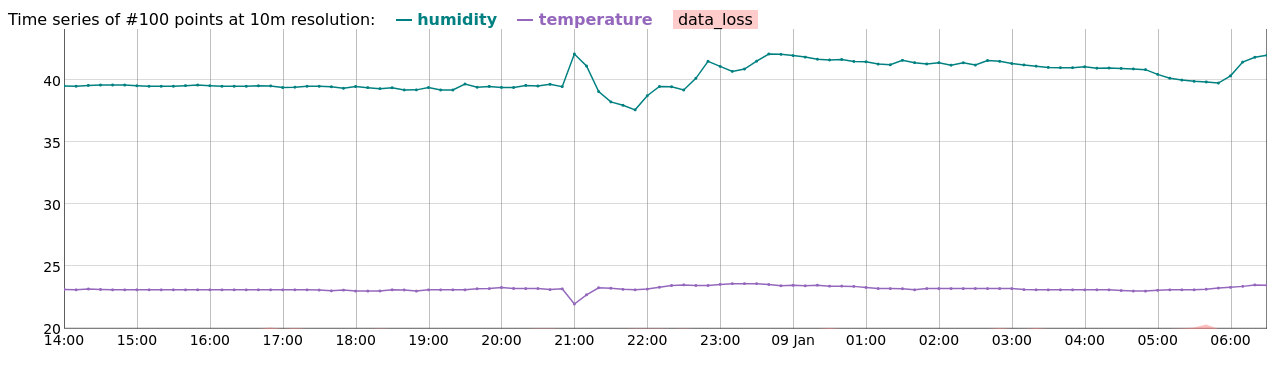

In [24]:
# Merge the first with the second. The common part is between original indexes 800 and 900 only, so 100 elements.
merged_timeseries = temeprature_slice_timeseries.merge(humidity_slice_timeseries)
merged_timeseries.plot()

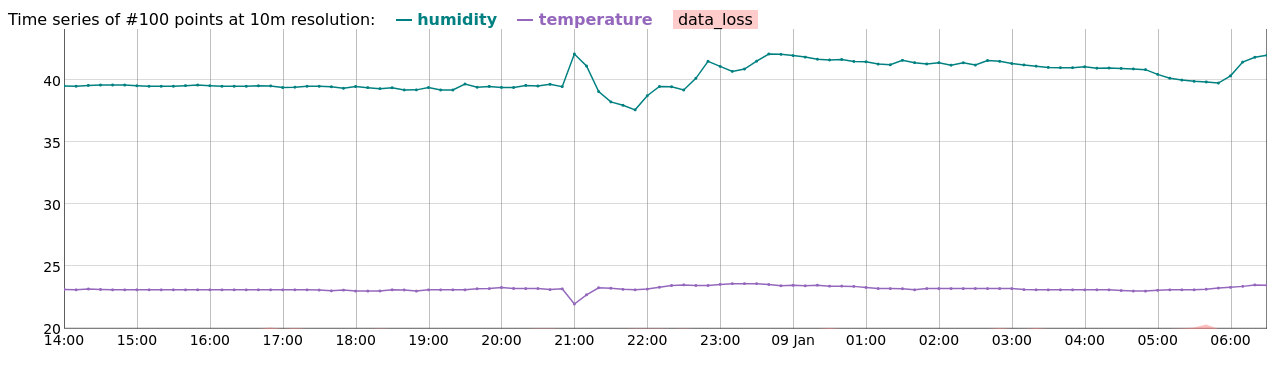

In [25]:
merged_timeseries.plot()

[INFO] timeseria.transformations: Using auto-detected sampling interval: 600.0s
[INFO] timeseria.transformations: Aggregated 5530 points in 37 slots


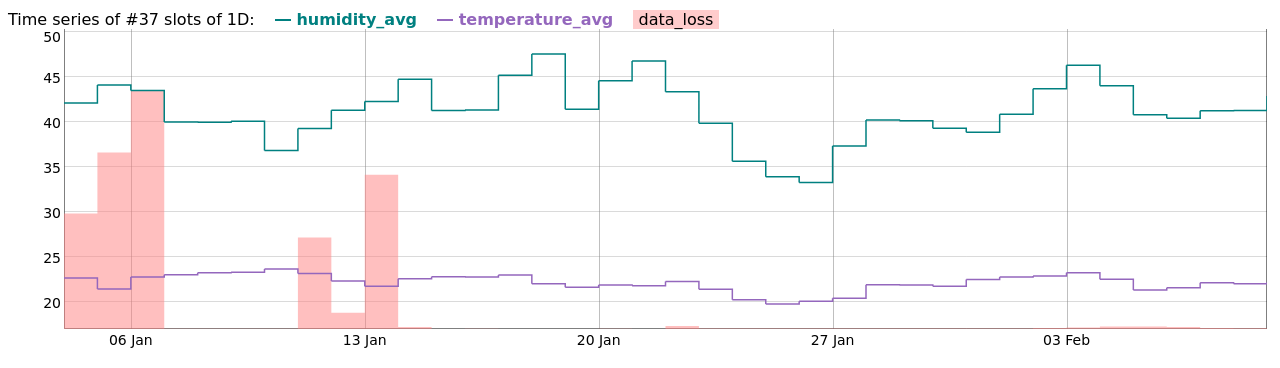

In [26]:
# Aggregate the time series in 1-day slots just for fun:
timeseries.aggregate('1D').plot()